# Entregável 3 de Visão Computacional e Robótica


Entrega até 12/03 ao fim do atendimento (a revisar)

Pode ser feito **em trios**

Nesta semana vamos trabalhar com um assunto extremamente atual: reconhecimento de objetos e rastreamento


Referências:

[https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

[https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/](https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/)

[https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

Ouça a explicacão do professor sobre rastreamento e deteção

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import biblioteca

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca)

NameError: name 'sys' is not defined

### Carregar as imagens

A seguir, vocês podem alterar qual imagem de teste esta sendo utilizada no notebook, o codigo deve funcionar em todas as 3.


In [2]:
img1 = cv2.imread("frame01.jpg")
img2 = cv2.imread("frame02.jpg")
img3 = cv2.imread("frame03.jpg") # Mais dificil



img = img1.copy()
img = img[40:,:]

## Parte 1
### Segmentar Linhas Amarelas
Modifique a função `segmenta_linha_amarela` do arquivo [fotogrametria.py](fotogrametria.py) para segmentar as linhas amarelas no centro da pista.

Utiliza a função cv2.morphologyEx() para limpar ruidos na imagem

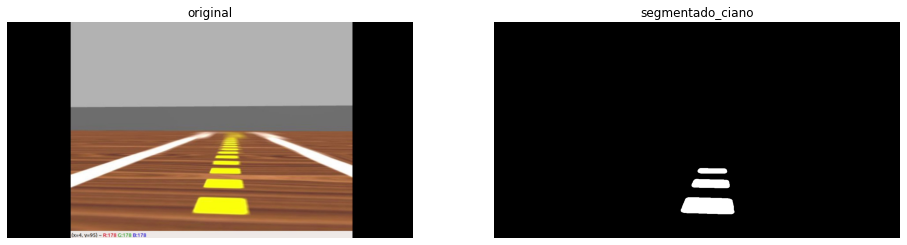

In [3]:
mask = biblioteca.segmenta_linha_amarela(img)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="Greys_r")
ax[0].set_title('original')
ax[1].set_title('segmentado_ciano')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o as linhas amarelas da pista em branco

## Parte 2
### Segmentar Segmentos da Linha Amarela
Modifique a função `encontrar_contornos` e `encontrar_centro_dos_contornos` do arquivo [fotogrametria.py](fotogrametria.py) calcular os contornos e calcular o centro. Na função `encontrar_centro_dos_contornos` desenhe também o centro com uma cruz.

Dica: Utilize `crosshair(img, point, size, color)` para desenhar uma cruz no ponto.

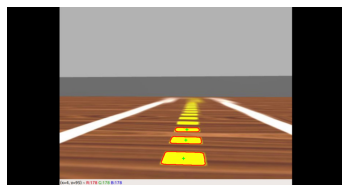

In [4]:
# Contornos
contornos = biblioteca.encontrar_contornos(mask)
cv2.drawContours(img, contornos, -1, [0, 0, 255], 2)

# # Centro de Massa
img, X, Y = biblioteca.encontrar_centro_dos_contornos(img, contornos)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Saida Esperada:
# Imagem original com os contornos de cada segmento denhados e uma cruz no centro de cada um.

## Parte 3
### Calcular Regressão Linear

Primeiro modifique a função `desenhar_linha_entre_pontos` do arquivo [fotogrametria.py](fotogrametria.py) para desenhar uma linha entre cada um dos centros dos segmentos.



Em seguida modifique a função `regressao_por_centro` do arquivo [fotogrametria.py](fotogrametria.py) para ajustar uma linha entre os centros dos segmentos. Desenhe a linha na imagem.



Dica: `cv2.line(img,ponto1,ponto2,color,2)` desenha uma linha que passe entre os pontos, mesmo que ponto1 e ponto2 `não pertençam` a imagem.

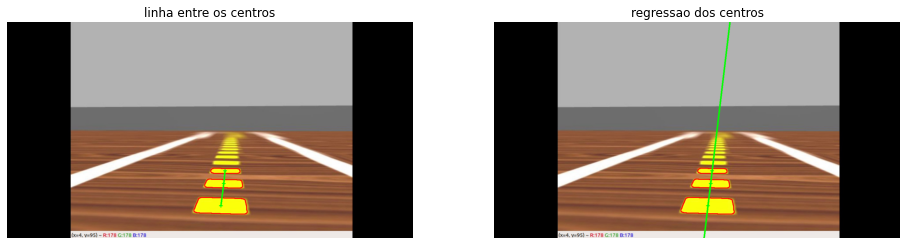

In [5]:
f, ax = plt.subplots(1, 2, figsize=(16,6))

# Desenhar Linha entre pontos
img = biblioteca.desenhar_linha_entre_pontos(img, X,Y, (255,0,0))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Regressão Linear
if X:
## Regressão pelo centro
    img, lm = biblioteca.regressao_por_centro(img, X,Y)

ax[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('linha entre os centros')
ax[1].set_title('regressao dos centros')

ax[0].axis('off')
ax[1].axis('off')

plt.show()
# Saida Esperada:
# Uma imagem com uma linha entreo os centros e outra com a regrassão dos pontos

## Parte 4
### Calcular angulo com a vertical.

Modifique a função `calcular_angulo_com_vertical` do arquivo [fotogrametria.py](fotogrametria.py) para calcular o angulo da reta obtida anteriormente com a VERTICAL.

In [6]:
angulo = biblioteca.calcular_angulo_com_vertical(img, lm)

print("Angulo = %s"%angulo)
# Saida Esperada:
# frame01.jpg: Angulo = 7.534561718846401
# frame02.jpg: Angulo = 61.844790049711605
# frame03.jpg: Angulo = 10.0

Angulo = 6.832596180951219


## Parte 5
### Repetir em um stream de video

Agora, modifique o arquivo [run_on_video.py](run_on_video.py) com todos os recursos mostrados anteriormente, para que a linha acompanhe o movimento do robo. Deve também mostrar o angulo com a vertical na image
### Baixe o arquivo a seguir para funcionar:
### https://github.com/Insper/robot202/raw/master/projeto/centro_massa/video.mp4

## Parte 6
### Ponto de Fuga

Robôs que trabalham dentro de prédios precisam saber seguir corredores.

Uma das maneiras de fazer isso é o robô alinhar o centro de sua câmera ao ponto de fuga do corredor, para que sua trajetória seja aproximadamente paralela às paredes do mesmo.


O ponto de fuga é aquele para o qual as retas paralelas parecem convergir

Dada a seguinte imagem de um corredor:

![Imagem do corredor](ponto_fuga.png)

Podemos traçar as linhas geradas pela perspectiva, seu ponto de encontro será o ponto de fuga.



### Revisão: reta passando por dois pontos

![Encontro de duas retas](retas.png)


Seja o ponto $A:(a_x, a_y)$ e o ponto $B:(b_x, b_y)$

Queremos encontrar uma reta $r: y = mx + h$ que passa por $A$ e $B$, em que $m$ é o *coeficiente angular* e $h$ é o intercepto ou coeficiente linear da reta.

Temos que:

$m = \frac{\Delta_y}{\Delta_x} = \frac{b_y - a_y}{b_x - a_x}$

Uma vez encontrado o valor de $m$, a substituição a seguir permite encontrar a equação da reta:

$m = \frac{y - a_y}{x - a_x}$

$mx - ma_x = y - a_y$

$mx = y - a_y + ma_x$

$y = mx -ma_x + a_y$

$h = a_y - ma_x$


$y = mx - ma_x + a_y$

### Interseção de duas retas

Temos que na interseção as duas retas se encontram num ponto $(x_i, y_i)$

Sejam as retas $r1: y = m1x + h1$ e $r2: y = m2x + h2$

Vamos encontrar o ponto $x_i$ em que os valores de $y_i$ serão iguais:

$m1x_i + h1 = m2x_i + h2$

$(m1 - m2)x_i = h2 - h1$

$x_i = \frac{h2 - h1}{m1 - m2}$

$y_i = m1x_i + h1$

**Dados de teste:**

Caso precise testar seu código, você pode conferir com estes valores. As retas definidas por pontos $r1: (P_1, P_2)$ e $r2: (Q_1, Q_2)$, para os valores:

```python

p1 = (3.0, 2.5)
p2 = (4.0, 0.6)
q1 = (1.0, 2.4)
q2 = (0.6, 1.1)
```

Encontram-se no ponto `(1.7572 4.8611)`


Pede-se: 

* A partir do ponto para onde convergem as linhas do corredor, marque o ponto de fuga no vídeo.  Você precisa mostrar as retas que vão convergir.


**Sugestão:** 

A partir do coeficiente angular, selecionar uma reta mais à esquerda e uma mais à direita para encontrar a interseção.

Lembre-se de que na OpenCV o eixo y fica **para baixo**, por isso os coeficientes angulares se comportam como na figura abaixo:

![Valores de coeficiente angular](coeficientes_m.png)

Lembre-se de que, no espaço de cores HSV, o vermelho se encontra no início e no fim da escala do componente H. Se você estiver filtrando vermelho em um só dos extremos pode não ter bons resultados

In [13]:
import biblioteca2

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca2) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca2)

NameError: name 'sys' is not defined

## Segmentar Faixas Brancas

(660, 880, 3)


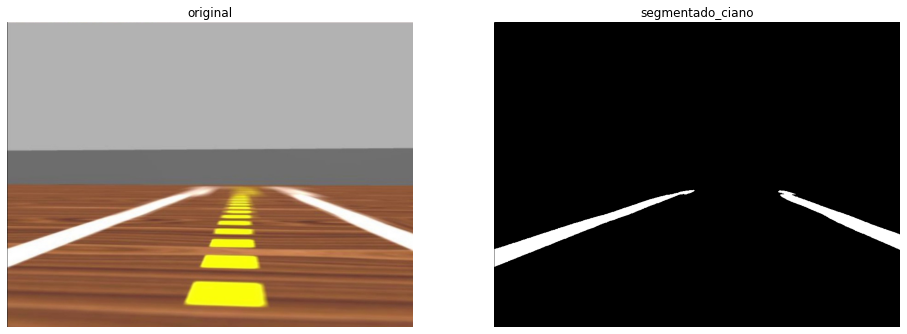

In [14]:
img = img1.copy()[30:-30,200:-200] # Remover barra de tarefa da imagem
print(img.shape)
mask = biblioteca2.segmenta_linha_branca(img)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="Greys_r")
ax[0].set_title('original')
ax[1].set_title('segmentado_ciano')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o as faixas brancas segmentadas

## Calcular Linha
Usando cv2.HoughLinesP() calcule apenas UMA linha que passe em cada uma das faixas

In [15]:
linhas = biblioteca2.estimar_linha_nas_faixas(img, mask)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="Greys_r")
ax[0].set_title('original')
ax[1].set_title('segmentado_ciano')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# APENAS uma linha magenta em cada faixa branca

TypeError: 'NoneType' object is not iterable

## Calcular Equações da Linha nas Faixas
Com os pontos de cada faixa, calcule a equação de cada reta

In [ ]:
equacoes = biblioteca2.calcular_equacao_das_retas(linhas)

for m, h in equacoes:
    print("Equacao: y = {m}x + {c}".format(m=m,c=h))

# Saida Esperada:
# Equacao: y = -0.3643410852713174x + 519.0
# Equacao: y = 0.38152610441767054x + 131.63855421686765

## Calcular Ponto de Fuga

Calcule o Ponto de Fuga da imagem, ou seja, o ponto de encontro entre as linhas.

In [ ]:
img, pontof = biblioteca2.calcular_ponto_de_fuga(img, equacoes)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print("Ponto de Fuga: " + str(pontof))
# Saida Esperada:
# Ponto de Fuga: (519, 329)

# Parte 6


Você deve detectar se há uma situação de perigo ou não perigo para as vacas.

Perigo
<img src="perigo.jpg" width=50%></img>

Não perigo
<img src="nao_perigo.jpg" width=50%></img>



#### Orientações

É uma situação de perigo quando: 
* Há mais lobos do que vacas
* As vacas estão contidas na bounding box dos lobos, conforme as figuras

Considere que toda detecção de `dog`, `horse`  e `sheep` também será de lobos.



Baixe o vídeo [ cow_wolf.mp4 neste endereço](Baixe o arquivo em https://github.com/Insper/robot20/blob/master/media/cow_wolf.mp4)


In [ ]:
import biblioteca_cow

if (sys.version_info > (3, 0)):
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca_cow) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca_cow)

## Carregar MobileNet

Siga os exemplos dado em aula para carregar a MobileNet no arquivo biblioteca_cow.py

Modifique a função `load_mobilenet` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para carregar a MobileNet.

Modifique a função `detect` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para fazer executar a MobileNet em uma imagem.

In [ ]:
img = cv2.imread("cow_wolf/cow_wolf01.png")

# Classes
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
    "sofa", "train", "tvmonitor"]

# Carregar Rede
net = biblioteca_cow.load_mobilenet()

# Detectar
CONFIDENCE = 0.7
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

saida, resultados = biblioteca_cow.detect(net, img, CONFIDENCE, COLORS, CLASSES)

print(resultados)

# Saida Esperada:
# [INFO] computing object detections...
# [INFO] cow: 99.06%
# [INFO] horse: 94.41%
# [INFO] horse: 93.70%
# [('cow', 99.0637481212616, (379, 131), (560, 251)), ('horse', 94.41149830818176, (53, 103), (297, 286)), ('horse', 93.70213747024536, (626, 103), (860, 285))]

## Regiao de Perigo

Modifique a função `separar_caixa_entre_animais` do arquivo [biblioteca_cow.py](biblioteca_cow.py) utilizando a saida da MobileNet para definir um caixa azul sobre cada vaca e uma caixa vermelha unindo ambos os lobos.

In [ ]:
saida, animais = biblioteca_cow.separar_caixa_entre_animais(img, resultados)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(saida, cv2.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].set_title('detectado')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Caixa vermelha sobre todos os lobos e uma caixa azul em cada vaca

## Descubra se a vaca esta em perigo
Modifique a função `checar_perigo` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para passar por cada vaca e modifique a função `calcula_iou` do arquivo [biblioteca_cow.py](biblioteca_cow.py) para calcular se existe intersecção entre as caixas.

Escreva sobre cada vaca se ela esta ou não em perigo.
Vermelho para perigo, se não, azul.

Dica: IoU (Intersection over Union): https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/

In [ ]:
biblioteca_cow.checar_perigo(saida, animais)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(saida, cv2.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].set_title('detectado')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Vaca esta em perigo (em vermlho) para a imagem cow_wolf01.png

# Final: Adicionar no video

Modifique o arquivo [cow_wolf.py](cow_wolf.py) para identificar se as vacas estao em perigo no video [cow_wolf.mp4]